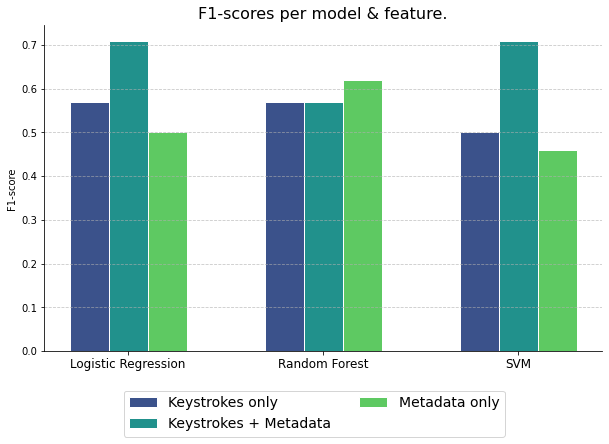

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data of F1-scores, methods, and category
methods = ['Logistic Regression', 'Random Forest', 'SVM']
categories = ['Keystrokes only', 'Keystrokes + Metadata', 'Metadata only']
f1_scores = [
    [0.57, 0.71, 0.50],
    [0.57, 0.57, 0.62],
    [0.50, 0.71, 0.46]
]

# Get colors from seaborn palette
sns_colors = sns.color_palette("viridis", len(categories))
colors_dict = dict(zip(categories, sns_colors))

# Define colors for the bars
colors = [colors_dict[category] for category in categories]

# Plot the F1-scores
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
x = np.arange(len(methods))

for i, category in enumerate(categories):
    f1_scores_category = [score[i] for score in f1_scores]
    ax.bar(x + i * bar_width, f1_scores_category, bar_width, color=colors[i], label=category, edgecolor='white')

ax.set_ylabel('F1-score')
ax.set_title('F1-scores per model & feature.', fontsize=16)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(methods, fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
# ax.legend(loc='lower right', fontsize=12)  # Comment this line

# Add legend to the grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=14)  # Adjust legend position

plt.show()


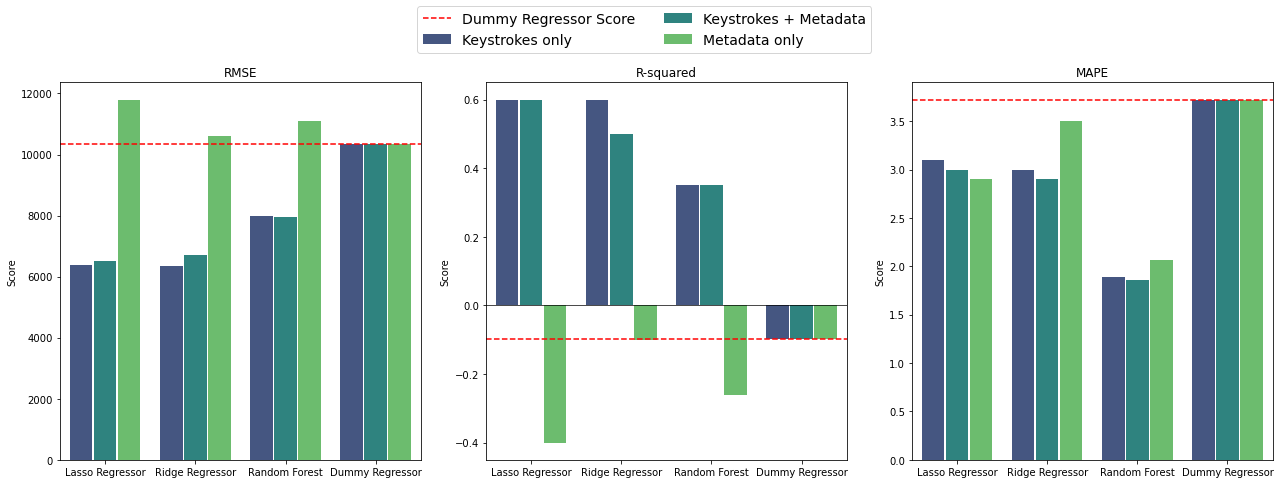

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your new data
data = {
    'Model': ['Lasso Regressor', 'Ridge Regressor', 'Lasso Regressor', 'Ridge Regressor', 'Lasso Regressor', 'Ridge Regressor',
              'Random Forest', 'Random Forest', 'Random Forest', 'Dummy Regressor', 'Dummy Regressor', 'Dummy Regressor'],
    'Features': ['Keystrokes only', 'Keystrokes only', 'Keystrokes + Metadata', 'Keystrokes + Metadata', 
                 'Metadata only', 'Metadata only', 'Keystrokes only', 'Keystrokes + Metadata', 'Metadata only',
                 'Keystrokes only', 'Keystrokes + Metadata', 'Metadata only'],
    'RMSE': [6386.7, 6360.1, 6514.2, 6707.9, 11773.2, 10597.9, 7972.27, 7963.36, 11107.90, 10354.493, 10354.493, 10354.493],
    'R-squared': [0.6, 0.6, 0.6, 0.5, -0.4, -0.1, 0.35, 0.35, -0.26, -0.097, -0.097, -0.097],
    'MAPE': [3.1, 3.0, 3.0, 2.9, 2.9, 3.5, 1.89, 1.86, 2.07, 3.715, 3.715, 3.715]
}


# Create DataFrame
df = pd.DataFrame(data)

# Separate data for each metric
metrics = ['RMSE', 'R-squared', 'MAPE']
dataframes = {metric: df[['Model', 'Features', metric]] for metric in metrics}

# Dummy regressor scores for each metric
dummy_scores = {
    'RMSE': 10354.493,
    'R-squared': -0.097,
    'MAPE': 3.715
}

# Plot - One grid (RMSE, R-squared, MAPE)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    dataframe = dataframes[metric].rename(columns={metric: 'Score'})
    ax = axs[i]
    bar = sns.barplot(data=dataframe, x='Model', y='Score', hue='Features', palette='viridis', ax=ax, ci=None)
    ax.axhline(dummy_scores[metric], color='r', linestyle='--', label='Dummy Regressor Score')
    # Draw a black line on the x-axis for the R-squared plot
    if metric == 'R-squared':
        ax.axhline(0, color='black', linestyle='-', linewidth=0.7)
    ax.set_title(metric)
    ax.legend().remove()
    ax.set_xlabel('')

    # Increase bar width
    for patch in bar.patches:
        current_width = patch.get_width()
        diff = current_width - 0.25

        # we change the bar width
        patch.set_width(0.25)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Add legend to the grid
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=2, fontsize=14)
plt.tight_layout()
plt.show()


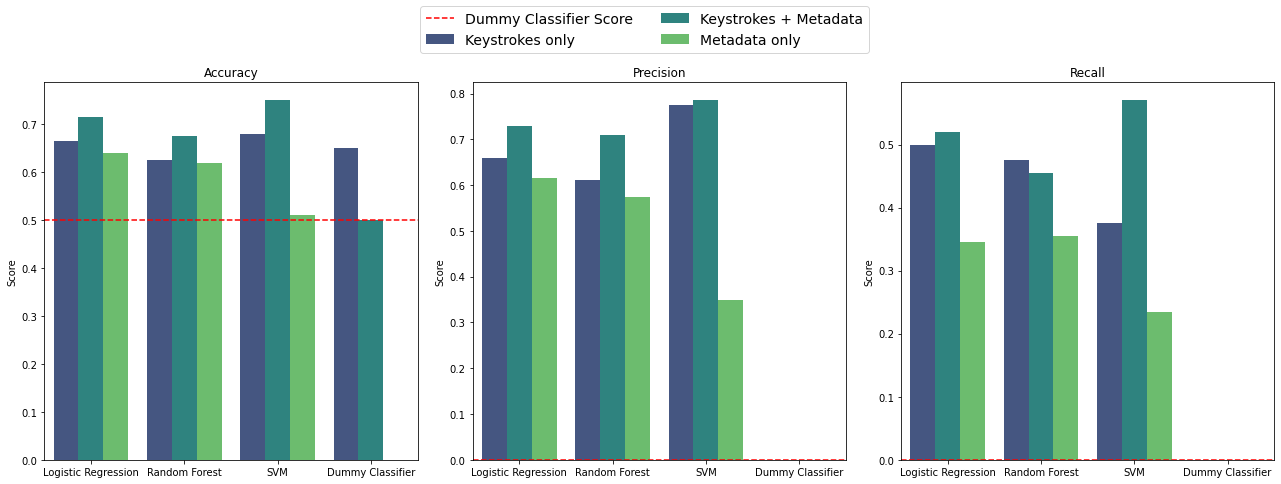

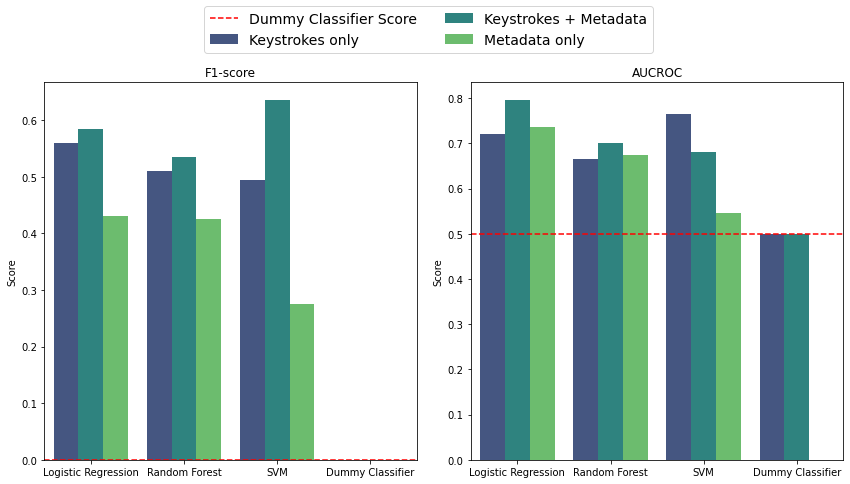

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your new data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Logistic Regression', 'Random Forest', 'SVM',
              'Logistic Regression', 'Random Forest', 'SVM', 'Logistic Regression', 'Random Forest', 'SVM',
              'Logistic Regression', 'Random Forest', 'SVM', 'Logistic Regression', 'Random Forest', 'SVM',
              'Dummy Classifier', 'Dummy Classifier'],
    'Features': ['Keystrokes only', 'Keystrokes only', 'Keystrokes only', 'Keystrokes only', 'Keystrokes only', 'Keystrokes only',
                 'Keystrokes + Metadata', 'Keystrokes + Metadata', 'Keystrokes + Metadata', 'Keystrokes + Metadata', 'Keystrokes + Metadata', 'Keystrokes + Metadata',
                 'Metadata only', 'Metadata only', 'Metadata only', 'Metadata only', 'Metadata only', 'Metadata only',
                 'Keystrokes only', 'Keystrokes + Metadata'],
    'Dataset': ['Cross-Validation', 'Cross-Validation', 'Cross-Validation', 'Test', 'Test', 'Test',
                'Cross-Validation', 'Cross-Validation', 'Cross-Validation', 'Test', 'Test', 'Test',
                'Cross-Validation', 'Cross-Validation', 'Cross-Validation', 'Test', 'Test', 'Test',
                'Cross-Validation', 'Test'],
    'Accuracy': [0.70, 0.69, 0.73, 0.63, 0.56, 0.63,
                  0.68, 0.72, 0.75, 0.75, 0.63, 0.75,
                  0.65, 0.55, 0.46, 0.63, 0.69, 0.56,
                  0.65, 0.50],
    'Precision': [0.65, 0.65, 0.80, 0.67, 0.57, 0.75,
                  0.63, 0.75, 0.74, 0.83, 0.67, 0.83,
                  0.48, 0.35, 0.10, 0.75, 0.80, 0.60,
                  0.00, 0.00],
    'Recall': [0.50, 0.45, 0.37, 0.50, 0.50, 0.38,
               0.41, 0.41, 0.51, 0.63, 0.50, 0.63,
               0.31, 0.21, 0.09, 0.38, 0.50, 0.38,
               0.00, 0.00],
    'F1-score': [0.55, 0.49, 0.49, 0.57, 0.53, 0.50,
                 0.46, 0.50, 0.56, 0.71, 0.57, 0.71,
                 0.36, 0.23, 0.09, 0.50, 0.62, 0.46,
                 0.00, 0.00],
    'AUCROC': [0.74, 0.75, 0.69, 0.70, 0.58, 0.84,
                 0.68, 0.73, 0.66, 0.91, 0.67, 0.70,
                 0.65, 0.65, 0.39, 0.82, 0.70, 0.70,
                 0.50, 0.50]
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate data for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUCROC']
dataframes = {metric: df[['Model', 'Features', 'Dataset', metric]] for metric in metrics}

# Dummy classifier scores for each metric
dummy_scores = {
    'Accuracy': 0.50,
    'Precision': 0.00,
    'Recall': 0.00,
    'F1-score': 0.00,
    'AUCROC': 0.50
}

# Plot - First grid (Accuracy, Precision, Recall)
fig, axs1 = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    dataframe = dataframes[metric].rename(columns={metric: 'Score'})
    ax = axs1[i]
    sns.barplot(data=dataframe, x='Model', y='Score', hue='Features', palette='viridis', ax=ax, ci=None)
    ax.axhline(dummy_scores[metric], color='r', linestyle='--', label='Dummy Classifier Score')
    ax.set_title(metric)
    ax.legend().remove()
    ax.set_xlabel('')

# Add legend to the first grid
handles, labels = axs1[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=2, fontsize=14)  

plt.tight_layout()

# Plot - Second grid (F1-score, AUCROC)
fig, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, metric in enumerate(metrics[3:]):
    dataframe = dataframes[metric].rename(columns={metric: 'Score'})
    ax = axs2[i]
    sns.barplot(data=dataframe, x='Model', y='Score', hue='Features', palette='viridis', ax=ax, ci=None)
    ax.axhline(dummy_scores[metric], color='r', linestyle='--', label='Dummy Classifier Score')
    ax.set_title(metric)
    ax.legend().remove()
    ax.set_xlabel('')

# Add legend to the second grid
handles, labels = axs2[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=2, fontsize=14)

plt.tight_layout()

# Show both grids
plt.show()


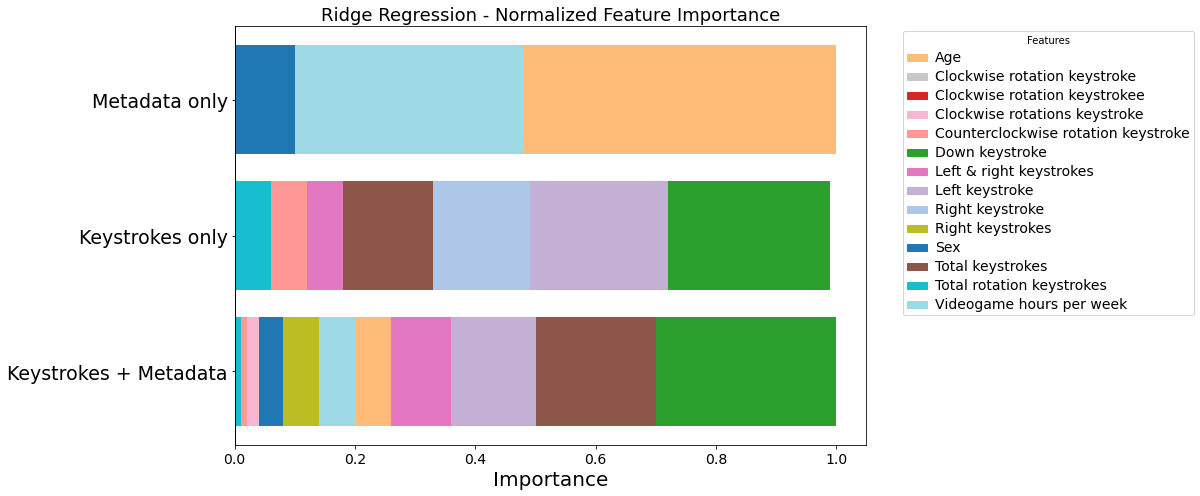

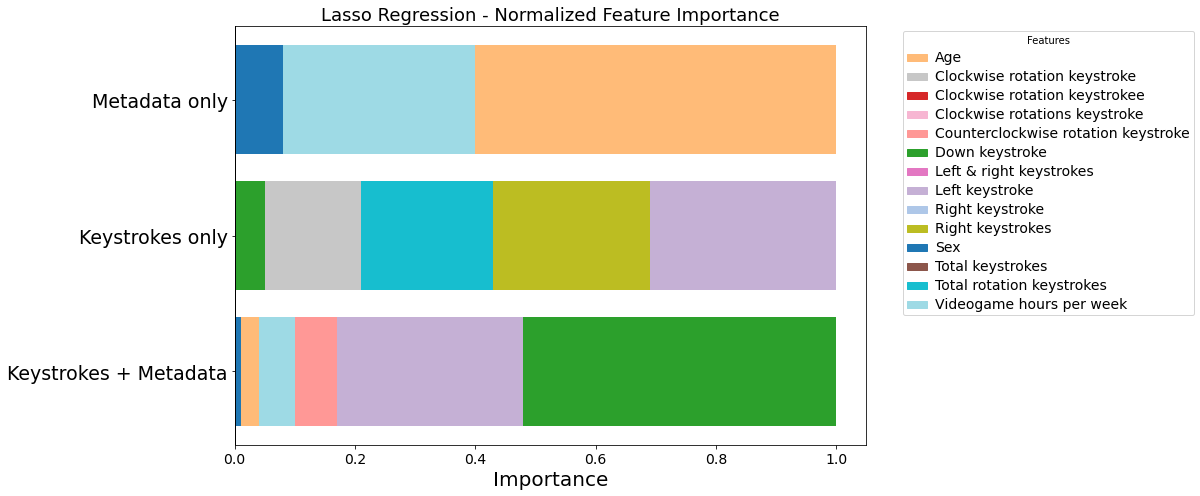

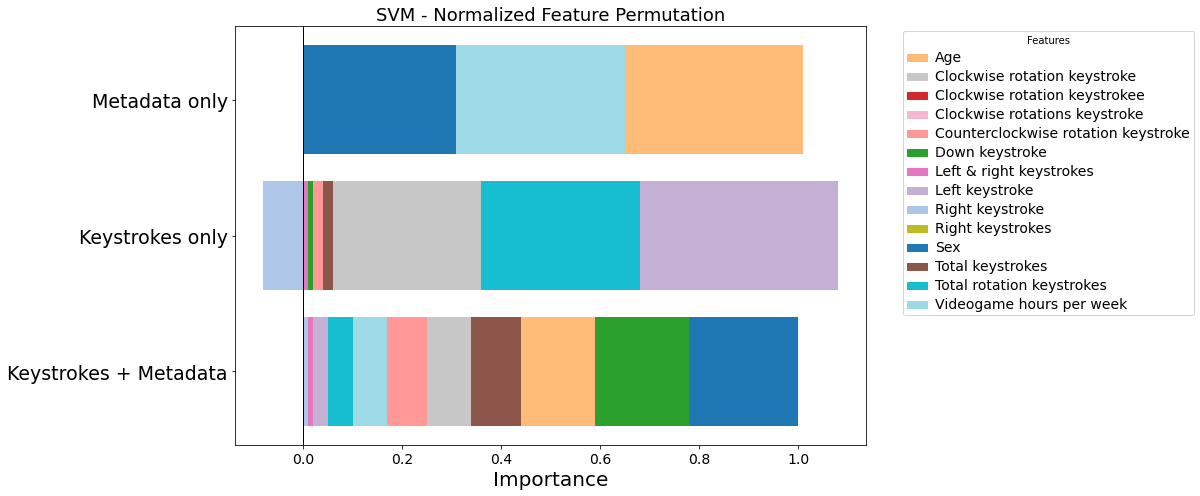

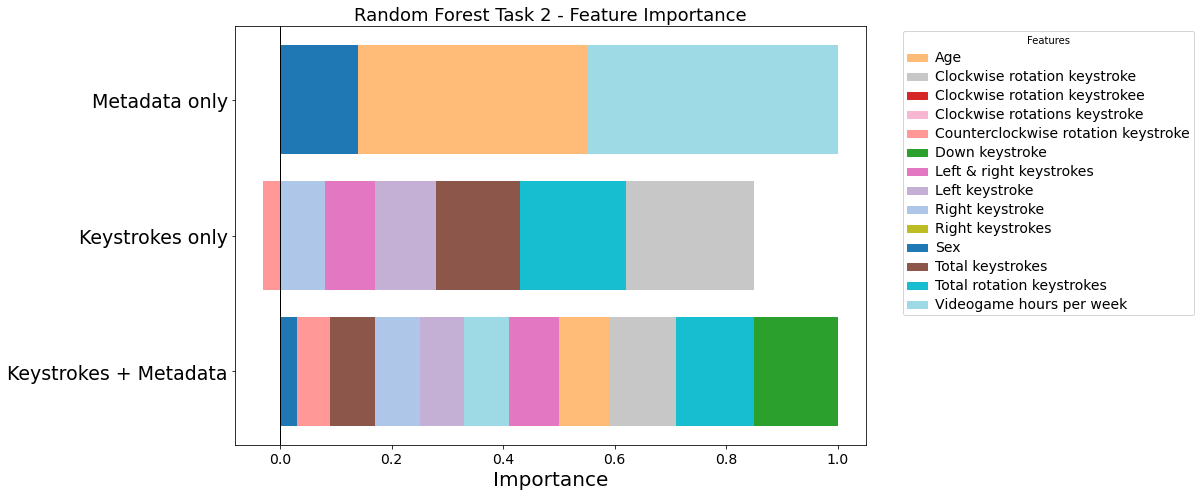

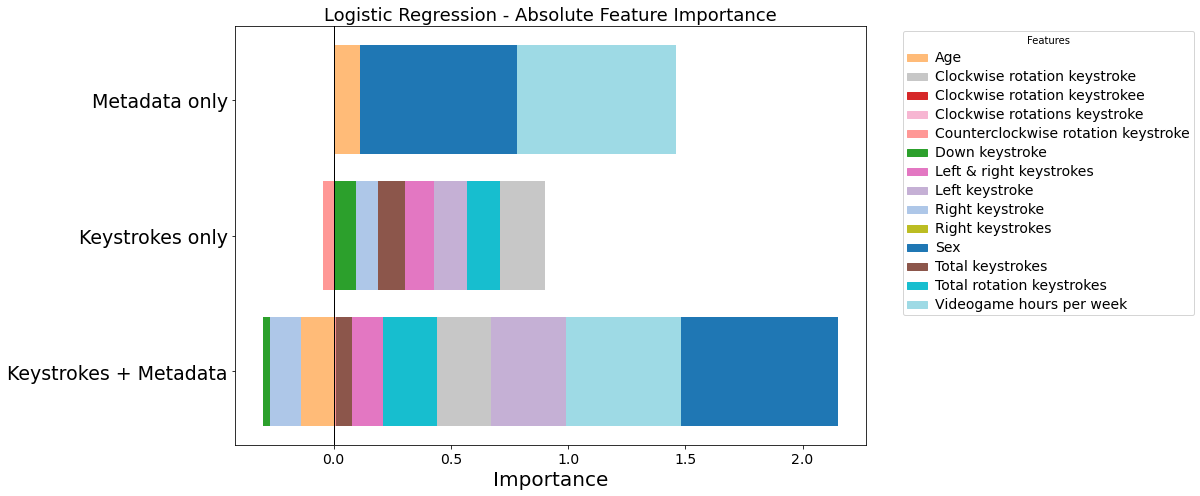

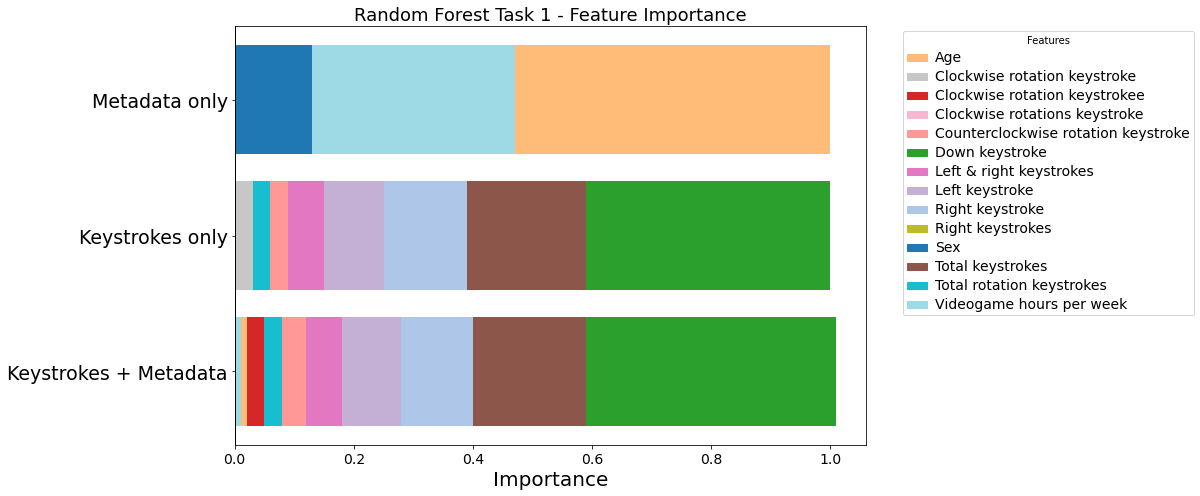

In [24]:
#Feature importance figuren

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Define the data for each model

data_random_task_1 = {
    "Metadata only": {
        "Age": 0.53,
        "Videogame hours per week": 0.34,
        "Sex": 0.13
    },
    "Keystrokes only": {
        "Down keystroke": 0.41,
        "Total keystrokes": 0.20,
        "Right keystroke": 0.14,
        "Left keystroke": 0.10,
        "Left & right keystrokes": 0.06,
        "Counterclockwise rotation keystroke": 0.03,
        "Total rotation keystrokes": 0.03,
        "Clockwise rotation keystroke": 0.03
    },
    "Keystrokes + Metadata": {
        "Down keystroke": 0.42,
        "Total keystrokes": 0.19,
        "Right keystroke": 0.12,
        "Left keystroke": 0.10,
        "Left & right keystrokes": 0.06,
        "Counterclockwise rotation keystroke": 0.04,
        "Total rotation keystrokes": 0.03,
        "Clockwise rotation keystrokee": 0.03,
        "Age": 0.01,
        "Videogame hours per week": 0.01,
        "Sex": 0.00
    }
}

data_ridge = {
    "Metadata only": {
        "Age": 0.52,
        "Videogame hours per week": 0.38,
        "Sex": 0.10
    },
    "Keystrokes only": {
        "Down keystroke": 0.27,
        "Left keystroke": 0.23,
        "Right keystroke": 0.16,
        "Total keystrokes": 0.15,
        "Left & right keystrokes": 0.06,
        "Counterclockwise rotation keystroke": 0.06,
        "Total rotation keystrokes": 0.06,
        "Clockwise rotation keystroke": 0.00
    },
    "Keystrokes + Metadata": {
        "Down keystroke": 0.30,
        "Total keystrokes": 0.20,
        "Left keystroke": 0.14,
        "Left & right keystrokes": 0.10,
        "Videogame hours per week": 0.06,
        "Right keystrokes": 0.06,
        "Age": 0.06,
        "Sex": 0.04,
        "Clockwise rotations keystroke": 0.02,
        "Counterclockwise rotation keystroke": 0.01,
        "Total rotation keystrokes": 0.01
    }
}

data_lasso = {
    "Metadata only": {
        "Age": 0.60,
        "Videogame hours per week": 0.32,
        "Sex": 0.08
    },
    "Keystrokes only": {
        "Left keystroke": 0.31,
        "Right keystrokes": 0.26,
        "Total rotation keystrokes": 0.22,
        "Clockwise rotation keystroke": 0.16,
        "Down keystroke": 0.05,
        "Total keystrokes": 0.00,
        "Left & right keystrokes": 0.00,
        "Counterclockwise rotation keystroke": 0.00
    },
    "Keystrokes + Metadata": {
        "Down keystroke": 0.52,
        "Left keystroke": 0.31,
        "Counterclockwise rotation keystroke": 0.07,
        "Videogame hours per week": 0.06,
        "Age": 0.03,
        "Sex": 0.01,
        "Total keystrokes": 0.00,
        "Right keystrokes": 0.00,
        "Left & right keystrokes": 0.00,
        "Clockwise rotation keystroke": 0.00,
        "Total rotation keystrokes": 0.00
    }
}

data_svm = {
    "Metadata only": {
        "Age": 0.36,
        "Videogame hours per week": 0.34,
        "Sex": 0.31
    },
    "Keystrokes only": {
        "Left keystroke": 0.4,
        "Total rotation keystrokes": 0.32,
        "Clockwise rotation keystroke": 0.3,
        "Total keystrokes": 0.02,
        "Counterclockwise rotation keystroke": 0.02,
        "Down keystroke": 0.01,
        "Left & right keystrokes": 0.01,
        "Right keystroke": -0.08
    },
    "Keystrokes + Metadata": {
        "Sex": 0.22,
        "Down keystroke": 0.19,
        "Age": 0.15,
        "Total keystrokes": 0.10,
        "Clockwise rotation keystroke": 0.09,
        "Counterclockwise rotation keystroke": 0.08,
        "Videogame hours per week": 0.07,
        "Total rotation keystrokes": 0.05,
        "Left keystroke": 0.03,
        "Right keystroke": 0.01,
        "Left & right keystrokes": 0.01
    }
}

data_rf = {
    "Metadata only": {
        "Videogame hours per week": 0.45,
        "Age": 0.41,
        "Sex": 0.14
    },
    "Keystrokes only": {
        "Clockwise rotation keystroke": 0.23,
        "Total rotation keystrokes": 0.19,
        "Left keystroke": 0.11,
        "Left & right keystrokes": 0.09,
        "Right keystroke": 0.08,
        "Total keystrokes": 0.15,
        "Down keystroke": 0.00,
        "Counterclockwise rotation keystroke": -0.03
    },
    "Keystrokes + Metadata": {
        "Down keystroke": 0.15,
        "Total rotation keystrokes": 0.14,
        "Clockwise rotation keystroke": 0.12,
        "Left & right keystrokes": 0.09,
        "Age": 0.09,
        "Total keystrokes": 0.08,
        "Right keystroke": 0.08,
        "Left keystroke": 0.08,
        "Videogame hours per week": 0.08,
        "Counterclockwise rotation keystroke": 0.06,
        "Sex": 0.03
    }
}

data_logreg = {
    "Metadata only": {
        "Videogame hours per week": 0.68,
        "Sex": 0.67,
        "Age": 0.11
    },
    "Keystrokes only": {
        "Clockwise rotation keystroke": 0.192,
        "Total rotation keystrokes": 0.143,
        "Left keystroke": 0.14,
        "Left & right keystrokes": 0.122,
        "Total keystrokes": 0.116,
        "Right keystroke": 0.096,
        "Down keystroke": 0.094,
        "Counterclockwise rotation keystroke": -0.047
    },
    "Keystrokes + Metadata": {
        "Sex": 0.67,
        "Videogame hours per week": 0.49,
        "Left keystroke": 0.32,
        "Clockwise rotation keystroke": 0.23,
        "Total rotation keystrokes": 0.23,
        "Left & right keystrokes": 0.13,
        "Total keystrokes": 0.07,
        "Counterclockwise rotation keystroke": 0.01,
        "Down keystroke": -0.03,
        "Right keystroke": -0.13,
        "Age": -0.14
    }
}

# Convert the data to pandas DataFrames
df_ridge = pd.DataFrame(data_ridge).fillna(0)
df_lasso = pd.DataFrame(data_lasso).fillna(0)
df_svm = pd.DataFrame(data_svm).fillna(0)
df_rf = pd.DataFrame(data_rf).fillna(0)
df_logreg = pd.DataFrame(data_logreg).fillna(0)
df_random_task_1 = pd.DataFrame(data_random_task_1).fillna(0)

# Get unique features from all models
all_features = set(df_ridge.index) | set(df_lasso.index) | set(df_svm.index) | set(df_rf.index) | set(df_logreg.index) | set(df_random_task_1.index)

# Generate enough distinct colors for each feature
colors = dict(zip(all_features, [mcolors.to_hex(c) for c in plt.cm.get_cmap('tab20', len(all_features))(np.arange(len(all_features)))]))

# Function to plot feature importance
def plot_feature_importance(df, colors, model_name, title_suffix='Feature Importance'):
    fig, ax = plt.subplots(figsize=(17, 7))
    df = df.reindex(index=df.index[::-1])
    for idx, cat in enumerate(df.columns):
        sorted_data = df[cat].sort_values(ascending=True).index.tolist()
        pos_data = [x for x in sorted_data if df.loc[x, cat] >= 0]
        neg_data = [x for x in sorted_data if df.loc[x, cat] < 0]
        for i, feature in enumerate(pos_data):
            if i == 0:
                ax.barh(cat, df.loc[feature, cat], color=colors[feature])
            else:
                ax.barh(cat, df.loc[feature, cat], left=df.loc[pos_data[:i], cat].sum(), color=colors[feature])
        for i, feature in enumerate(neg_data):
            if i == 0:
                ax.barh(cat, df.loc[feature, cat], color=colors[feature])
            else:
                ax.barh(cat, df.loc[feature, cat], left=df.loc[neg_data[:i], cat].sum(), color=colors[feature])
    handles = [plt.Rectangle((0,0),1,1, color=colors[feature]) for feature in sorted(all_features)]
    legend = plt.legend(handles, sorted(all_features), title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.setp(legend.texts, fontsize='14') 
    ax.invert_yaxis()
    ax.axvline(0, color='black', linewidth=1)
    plt.title(f'{model_name} {title_suffix}', fontsize='18')
    plt.xlabel('Importance',fontsize='20')
    plt.xticks(fontsize='14')
    plt.yticks(fontsize=19)
    plt.tight_layout()
    plt.show()

# Plot feature importance for each model
plot_feature_importance(df_ridge, colors, 'Ridge Regression - Normalized')
plot_feature_importance(df_lasso, colors, 'Lasso Regression - Normalized')
plot_feature_importance(df_svm, colors, 'SVM - Normalized', 'Feature Permutation')
plot_feature_importance(df_rf, colors, 'Random Forest Task 2 -')
plot_feature_importance(df_logreg, colors, 'Logistic Regression - Absolute')
plot_feature_importance(df_random_task_1, colors, 'Random Forest Task 1 -')





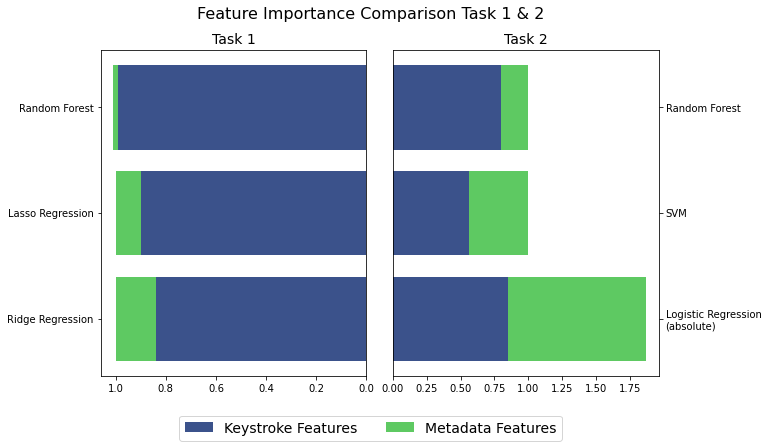

In [9]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Define the data
data_ridge = {
    "Down keystroke": 0.30,
    "Total keystrokes": 0.20,
    "Left keystroke": 0.14,
    "Left & right keystrokes": 0.10,
    "Videogame hours per week": 0.06,
    "Right keystroke": 0.06,
    "Age": 0.06,
    "Sex": 0.04,
    "Clockwise rotation keystroke": 0.02,
    "Counterclockwise rotation keystroke": 0.01,
    "Total rotation keystrokes": 0.01
}

data_lasso = {
    "Down keystroke": 0.52,
    "Left keystroke": 0.31,
    "Counterclockwise rotation keystroke": 0.07,
    "Videogame hours per week": 0.06,
    "Age": 0.03,
    "Sex": 0.01,
    "Total keystrokes": 0.00,
    "Right keystroke": 0.00,
    "Left & right keystrokes": 0.00,
    "Clockwise rotation keystroke": 0.00,
    "Total rotation keystrokes": 0.00
}

# Random Task 1 feature importance data
data_random = {
    "Down keystroke": 0.42,
    "Total keystrokes": 0.19,
    "Right keystroke": 0.12,
    "Left keystroke": 0.10,
    "Left & right keystrokes": 0.06,
    "Counterclockwise rotation keystroke": 0.04,
    "Total rotation keystrokes": 0.03,
    "Clockwise rotation keystroke": 0.03,
    "Age": 0.01,
    "Videogame hours per week": 0.01,
    "Sex": 0.00
}

# Continue with the rest of the code...

# List of keystroke and metadata features
keystroke_features = ["Down keystroke", "Left keystroke", "Counterclockwise rotation keystroke", "Total keystrokes", 
                      "Right keystroke", "Left & right keystrokes", "Clockwise rotation keystroke", "Total rotation keystrokes"]
metadata_features = ["Videogame hours per week", "Age", "Sex"]

# Merge the keystroke and metadata features for each model
ridge_keystroke = sum(data_ridge[key] for key in keystroke_features)
ridge_metadata = sum(data_ridge[key] for key in metadata_features)
lasso_keystroke = sum(data_lasso[key] for key in keystroke_features)
lasso_metadata = sum(data_lasso[key] for key in metadata_features)
random_keystroke = sum(data_random[key] for key in keystroke_features)
random_metadata = sum(data_random[key] for key in metadata_features)


# Define the data
data_svm = {
    "Sex": 0.22,
    "Down keystroke": 0.19,
    "Age": 0.15,
    "Total keystrokes": 0.10,
    "Clockwise rotation keystroke": 0.09,
    "Counterclockwise rotation keystroke": 0.08,
    "Videogame hours per week": 0.07,
    "Total rotation keystrokes": 0.05,
    "Left keystroke": 0.03,
    "Right keystroke": 0.01,
    "Left & right keystrokes": 0.01
}

data_rf = {
    "Down keystroke": 0.15,
    "Total rotation keystrokes": 0.14,
    "Clockwise rotation keystroke": 0.12,
    "Left & right keystrokes": 0.09,
    "Age": 0.09,
    "Total keystrokes": 0.08,
    "Right keystroke": 0.08,
    "Left keystroke": 0.08,
    "Videogame hours per week": 0.08,
    "Counterclockwise rotation keystroke": 0.06,
    "Sex": 0.03
}

data_logreg = {
    "Sex": 0.67,
    "Videogame hours per week": 0.49,
    "Left keystroke": 0.32,
    "Clockwise rotation keystroke": 0.23,
    "Total rotation keystrokes": 0.23,
    "Left & right keystrokes": 0.13,
    "Total keystrokes": 0.07,
    "Right keystroke": -0.13,  # Negative values may cause issues with the stacked bar plot.
    "Age": -0.14  # Negative values may cause issues with the stacked bar plot.
}

# List of keystroke and metadata features
keystroke_features = ["Down keystroke", "Left keystroke", "Counterclockwise rotation keystroke", "Total keystrokes", 
                      "Right keystroke", "Left & right keystrokes", "Clockwise rotation keystroke", "Total rotation keystrokes"]
metadata_features = ["Videogame hours per week", "Age", "Sex"]

# Merge the keystroke and metadata features for each model
svm_keystroke = sum(data_svm.get(key, 0) for key in keystroke_features)
svm_metadata = sum(data_svm.get(key, 0) for key in metadata_features)
rf_keystroke = sum(data_rf.get(key, 0) for key in keystroke_features)
rf_metadata = sum(data_rf.get(key, 0) for key in metadata_features)
logreg_keystroke = sum(data_logreg.get(key, 0) for key in keystroke_features)
logreg_metadata = sum(data_logreg.get(key, 0) for key in metadata_features)

# Then create two subplots next to each other without sharing the y-axis
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Define labels for each task
labels1 = ['Ridge Regression', 'Lasso Regression', 'Random Forest']
labels2 = ['Logistic Regression \n(absolute)', 'SVM', 'Random Forest']  # Logistic Regression moved to the first position

# Define keystroke and metadata data for each task
keystroke_data1 = [ridge_keystroke, lasso_keystroke, random_keystroke]
metadata_data1 = [ridge_metadata, lasso_metadata, random_metadata]

keystroke_data2 = [logreg_keystroke, svm_keystroke, rf_keystroke]  # Corresponding change in data order
metadata_data2 = [logreg_metadata, svm_metadata, rf_metadata]  # Corresponding change in data order

# Define colors for the bars from seaborn palette
colors = [colors_dict['Keystrokes only'], colors_dict['Metadata only']]

# Create the bar plots for the first subplot
bar1 = ax1.barh(labels1, keystroke_data1, color=colors[0], label='Keystroke Features')
bar2 = ax1.barh(labels1, metadata_data1, left=keystroke_data1, color=colors[1], label='Metadata Features')

# Set the labels and title for the first subplot
ax1.set_title('Task 1', fontsize=14)  # Adjust the fontsize
ax1.invert_xaxis()

# Now create the bar plots for the second subplot
bar1 = ax2.barh(labels2, keystroke_data2, color=colors[0], label='Keystroke Features')
bar2 = ax2.barh(labels2, metadata_data2, left=keystroke_data2, color=colors[1], label='Metadata Features')

# Set the labels and title for the second subplot
ax2.set_title('Task 2', fontsize=14)  # Adjust the fontsize
ax2.yaxis.tick_right()  # Move y-axis ticks to the right

# Show the plots
plt.subplots_adjust(wspace=0.1)  # This removes the space between the two plots
plt.suptitle("Feature Importance Comparison Task 1 & 2", fontsize=16)  # Super title for the whole figure

# Create a legend for the whole figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=14)  # Adjust the position and fontsize of legend

plt.show()